In [1]:
#Unigram and bigram code

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from scipy import sparse
from scipy.sparse import csc_matrix
from scipy.sparse import random
import math 
# import re

[nltk_data] Downloading package punkt to /Users/School/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/School/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#Importing dataset
trainDf = pd.read_csv('train_processed.csv', sep = ',')
testDf = pd.read_csv('test_processed.csv', sep = ',')

In [4]:
trainDf.head()

,Unnamed: 0,0,1,0.1
0,0,1,0,USER_MENTION when a father is dysfunctional an...
1,1,2,0,USER_MENTION USER_MENTION thanks for lyft cred...
2,2,3,0,bihday your majesty
3,3,4,0,model i love u take with u all the time in urð
4,4,5,0,factsguide society now motivation


In [5]:
# c = trainDf[["0.1"]]
# c.head()

In [6]:
tweetsTrain = pd.DataFrame(trainDf)
tweetsTrain.head()

,Unnamed: 0,0,1,0.1
0,0,1,0,USER_MENTION when a father is dysfunctional an...
1,1,2,0,USER_MENTION USER_MENTION thanks for lyft cred...
2,2,3,0,bihday your majesty
3,3,4,0,model i love u take with u all the time in urð
4,4,5,0,factsguide society now motivation


In [7]:
trainTweetsProc = [] # Creating an empty list to store the data set above.
i = 0
while i < tweetsTrain.shape[0]:
    trainTweetsProc.append([tweetsTrain.iloc[i,1], tweetsTrain.iloc[i,2], tweetsTrain.iloc[i,3]]) # Adds each row to the list, excluding the first column of the data set.
    i += 1

trainTweetsP = pd.DataFrame(trainTweetsProc) # Casts the list to a data frame, which is cleaned.
trainTweetsP.head()

,0,1,2
0,1,0,USER_MENTION when a father is dysfunctional an...
1,2,0,USER_MENTION USER_MENTION thanks for lyft cred...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in urð
4,5,0,factsguide society now motivation


In [8]:
tweetsTraining = trainTweetsP[[2]] # Extracts the tweets column from the clean data frame above.
tweetsTraining.head()

,2
0,USER_MENTION when a father is dysfunctional an...
1,USER_MENTION USER_MENTION thanks for lyft cred...
2,bihday your majesty
3,model i love u take with u all the time in urð
4,factsguide society now motivation


In [9]:
tweetTrainingList = [] # Creating an empty list to store the tweets.
i = 0
while i < tweetsTraining.shape[0]:
    tweetTrainingList.append(tweetsTraining.iloc[i,0]) # Adds each tweet to the list.
    i += 1

In [10]:
stringOfTrainTweets = " ".join(tweetTrainingList) # Joins the tweets

In [11]:
stopWords = set(stopwords.words('english'))
tokens = word_tokenize(stringOfTrainTweets)
wordsFiltered = []

for w in tokens:
    if w not in stopWords:
        wordsFiltered.append(w)

In [12]:
#Creating Unigram

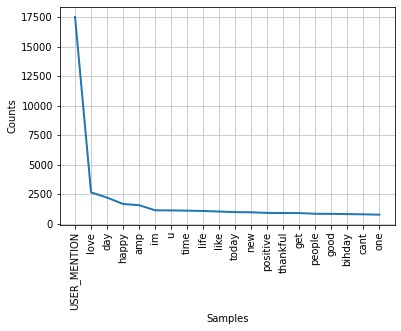

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [13]:
#Plotting unigram
# r = trainDf[["0.1"]]
# trainDf_string = trainDf.to_string()
#creating tokens
# tokens = word_tokenize(stringOfTrainTweets)
vocab = set(wordsFiltered)
frequencyDist = nltk.FreqDist(wordsFiltered)
data = sorted(frequencyDist,key=frequencyDist.__getitem__, reverse=True)
data[0:20]
frequencyDist.plot(20, cumulative=False)

In [14]:
len(vocab) 
# Proportionally number of sparse vector = 3440
# Number of dense vector = 20,650

41435

In [15]:
sparseVector = data[0:3430]
denseVector = data[0:20580]
denseVector[0:10]

['USER_MENTION',
 'love',
 'day',
 'happy',
 'amp',
 'im',
 'u',
 'time',
 'life',
 'like']

In [16]:
output = []
i = 0
while i < len(tweetTrainingList):
    tokens1 = word_tokenize(tweetTrainingList[i])
    tweetFil = []
    for w in tokens1:
        if w not in stopWords:
            tweetFil.append(w)
    output.extend(list(ngrams(tweetFil, 2)))
    i += 1

In [17]:
# a = "the weather today is pleasant"
# b = a.split(" ")
# print(b)

In [18]:
# output = []
# i = 0
# while i < len(tweetTrainingList):
#     tokens = [token for token in tweetTrainingList[i].split(" ") if token != ""]
#     output.extend(list(ngrams(tokens, 2)))
#     i += 1

In [19]:
output[0:10]

[('USER_MENTION', 'father'),
 ('father', 'dysfunctional'),
 ('dysfunctional', 'selfish'),
 ('selfish', 'drags'),
 ('drags', 'kids'),
 ('kids', 'dysfunction'),
 ('dysfunction', 'run'),
 ('USER_MENTION', 'USER_MENTION'),
 ('USER_MENTION', 'thanks'),
 ('thanks', 'lyft')]

In [20]:
bigrams = set(output)
frequency_dist = nltk.FreqDist(output)
data1 = sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)
data1[0:20]

[('USER_MENTION', 'USER_MENTION'),
 ('fathers', 'day'),
 ('thankful', 'positive'),
 ('positive', 'affirmation'),
 ('love', 'u'),
 ('cant', 'wait'),
 ('u', 'take'),
 ('take', 'u'),
 ('u', 'time'),
 ('model', 'love'),
 ('time', 'urð'),
 ('i_am', 'positive'),
 ('blog', 'silver'),
 ('silver', 'gold'),
 ('gold', 'forex'),
 ('altwaystoheal', 'healthy'),
 ('via', 'USER_MENTION'),
 ('polar', 'bear'),
 ('whatever', 'want'),
 ('bull', 'dominate')]

In [21]:
len(data1)

161278

In [22]:
len(bigrams)

161278

In [23]:
bigramsVocab = data1[0:830]
bigramsVocab[0:10]

[('USER_MENTION', 'USER_MENTION'),
 ('fathers', 'day'),
 ('thankful', 'positive'),
 ('positive', 'affirmation'),
 ('love', 'u'),
 ('cant', 'wait'),
 ('u', 'take'),
 ('take', 'u'),
 ('u', 'time'),
 ('model', 'love')]

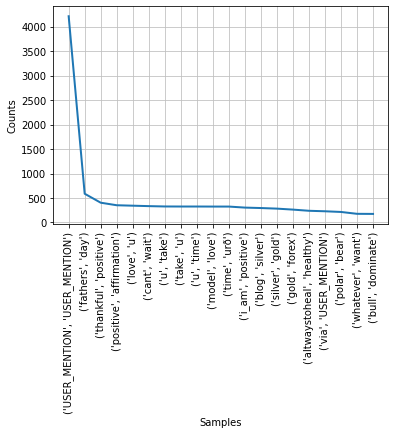

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [24]:
frequency_dist.plot(20, cumulative=False)

In [25]:
vectorizer = CountVectorizer()
>>> vectorizer   

CountVectorizer()

In [26]:
tweetTrainingList[30000]

'i will never msg him first if he dun msg me firstdisappointed'

In [27]:
tweetListFiltered = []
for element in tweetTrainingList:
    words = word_tokenize(element)
    wordsFiltered = []

    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)
    tweetListFiltered.append(" ".join(wordsFiltered))

In [28]:
tweetListFiltered[30000]

'never msg first dun msg firstdisappointed'

In [29]:
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])
print(a+b)

[ 7  9 11 13 15]


In [30]:
csc_matrix((3, 4), dtype=np.int8).toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [31]:
def get_sparse_size(matrix):
    # get size of a sparse matrix
    return int((matrix.data.nbytes + matrix.indptr.nbytes + matrix.indices.nbytes) / 1024.)

In [32]:
# create a sparse matrix, 1000 x 100000
sparse_mat = random(10 ** 3, 10 ** 5, format='csr')

In [33]:
# get size of a sparse matrix
sparse_size = get_sparse_size(sparse_mat)

In [34]:
# convert sparse matrix to a regular matrix and get its size
regular_size = sparse_mat.toarray().nbytes / 1024.

In [35]:
print("The size of sparse matrix is %s KiB" % sparse_size)
print("The size of regular matrix is %s KiB" % regular_size)
print("Data compression ratio is %s" % (regular_size / sparse_size))

The size of sparse matrix is 11722 KiB
The size of regular matrix is 781250.0 KiB
Data compression ratio is 66.6481829039413


In [36]:
np.random.seed(10)
matrix = random(3, 3, format='lil', density=0.6)
matrix.toarray()

array([[0.        , 0.08833981, 0.16911084],
       [0.        , 0.        , 0.        ],
       [0.19806286, 0.76053071, 0.22479665]])

In [37]:
matrix.data

array([list([0.08833981417401027, 0.16911083656253545]), list([]),
       list([0.19806286475962398, 0.7605307121989587, 0.22479664553084766])],
      dtype=object)

In [38]:
matrix.rows

array([list([1, 2]), list([]), list([0, 1, 2])], dtype=object)

In [39]:
def get_item(row_index, column_index, matrix):
    row_values = matrix.data[row_index]
    row_indices = matrix.rows[row_index]

    value_index = row_indices.index(column_index)
    if value_index >= 0:
        return row_values[value_index]
    else:
        return 0

In [40]:
print(matrix[2, 2])

0.22479664553084766


In [41]:
corpus = [
...     'this is the first document',
...     'this is the second second document',
...     'and the third one',
...     'is this the first document',
... ]
    
listOfTokens = ['this', 'is', 'the', 'first', 'first document', 'second document']
[1,1,1,1,1,0]

[1, 1, 1, 1, 1, 0]

In [42]:
sparseVector.extend(bigramsVocab)

In [43]:
sparseVector[3431:3435]

[('fathers', 'day'),
 ('thankful', 'positive'),
 ('positive', 'affirmation'),
 ('love', 'u')]

In [44]:
sparseVectorMod = sparseVector

In [45]:
i = 3430
while i < len(sparseVectorMod):
    element = " ".join(sparseVectorMod[i])
    sparseVectorMod[i] = element
    i += 1

In [46]:
sparseVectorMod[3431:3435]

['fathers day', 'thankful positive', 'positive affirmation', 'love u']

In [47]:
sparseVectorA = sparseVectorMod[0:3430]

In [48]:
print(sparseVectorA[0])
print(sparseVectorA[3429])

USER_MENTION
instalikeâ


In [49]:
sparseVectorB = sparseVectorMod[3430:4260]

In [50]:
print(sparseVectorB[0])
print(sparseVectorB[829])

USER_MENTION USER_MENTION
love summer


In [51]:
tweetVectors = []
i = 0
while i < len(tweetListFiltered):
    tweetWords = tweetListFiltered[i].split()
    vector = []
    for element in sparseVectorA:
        j = 0
        k = 0
        while j < len(tweetWords):
            if tweetWords[j] == element:
                k += 1
            j += 1
        vector.append(k)
    for element in sparseVectorB:
        bigramWords = element.split()
        j = 0
        k = 0
        while j < len(tweetWords)-1:
            if tweetWords[j] == bigramWords[0] and tweetWords[j+1] == bigramWords[1]:
                k += 1
            j += 1
        vector.append(k)
    tweetVectors.append(vector)
    i += 1

In [52]:
numTweetsWTerm = []
for element in sparseVectorA:
    m = 0
    for tweet in tweetListFiltered:
        tweetWords = tweet.split()
        if element in tweetWords:
            m += 1
    numTweetsWTerm.append(m)
for element in sparseVectorB:
    m = 0
    for tweet in tweetListFiltered:
        tweetWords = tweet.split()
        big = list(ngrams(tweetWords, 2))
        bigrams = []
        for part in big:
            portion = " ".join(part)
            bigrams.append(portion)
        if element in bigrams:
            m += 1
    numTweetsWTerm.append(m)

In [53]:
len(numTweetsWTerm)

4260

In [54]:
numTweetsWTerm[0:10]

[11098, 2515, 2062, 1593, 1428, 1077, 717, 1090, 1016, 994]

In [55]:
numTweetsWTerm[4250:4260]

[12, 12, 12, 12, 12, 12, 12, 12, 12, 12]

In [56]:
tweetVectorsIDF = []
for element in tweetVectors:
    i = 0
    vector = []
    for piece in element:
        term = math.log10((1+len(tweetListFiltered))/(1+numTweetsWTerm[i]))+1
        newTerm = piece * term
        vector.append(newTerm)
        i += 1
    tweetVectorsIDF.append(vector)

In [57]:
idfVectors = np.array(tweetVectorsIDF)

In [58]:
tweetVectors1 = []
for tweet in tweetListFiltered:
    tweetWords = tweet.split()
    bigr = list(ngrams(tweetWords, 2))
    bigrams = []
    for part in bigr:
        portion = " ".join(part)
        bigrams.append(portion)
    vector = []
    for element in sparseVectorA:
        if element in tweetWords:
            k = 1
        else:
            k = 0
        vector.append(k)
    for element in sparseVectorB:
        if element in bigrams:
            k = 1
        else:
            k = 0
        vector.append(k)
    tweetVectors1.append(vector)


In [59]:
len(tweetVectors1)

31962

In [60]:
tweetVectors1[500][5:8]

[0, 0, 0]

In [61]:
sparseVectorA[10]

'today'

In [62]:
sparseVectorA.index('talking')

572

In [63]:
tweetVectorsA = np.array(tweetVectors1)

In [64]:
#Classification Techniques

In [65]:
#Decision Tree

In [66]:
#Libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [67]:
#Independent variable
x = tweetVectorsA[0:25570]
x1 = tweetVectorsA[25570:31962]
xF = idfVectors[0:25570]
xF1 = idfVectors[25570:31962]
#Dependent variable
y = trainTweetsP[1][0:25570].to_numpy() 
y1 = trainTweetsP[1][25570:31962].to_numpy() 

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split( x, 
                                                     y, 
                                                    test_size = 0.3, 
                                                    random_state = 100)

In [69]:
#DT Classifier

In [70]:
dtc_gini = DecisionTreeClassifier(criterion='gini',random_state=100, max_depth=5)

In [71]:
dtc_gini.fit(xF,y)

DecisionTreeClassifier(max_depth=5, random_state=100)

In [72]:
Y_pred = dtc_gini.predict(xF1)

In [73]:
Y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [74]:
print("Accuracy of Decision Tree (gini index) on test data: ", accuracy_score(y1, Y_pred)*100)

Accuracy of Decision Tree (gini index) on test data:  93.94555694618273


In [75]:
#Conclusion: DTC accuracy is largely unaffected by different ratios for test and train data

In [76]:
#Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30) #Using 30 random trees has given the best accuracy overall
model.fit(xF, y)

RandomForestClassifier(n_estimators=30)

In [78]:
model.score(X_test,Y_test)

0.930647894668231

In [79]:
Y_predict = model.predict(xF1)

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1,Y_predict)

In [81]:
import seaborn
import matplotlib.pyplot as plt

Text(33.0, 0.5, 'Truth')

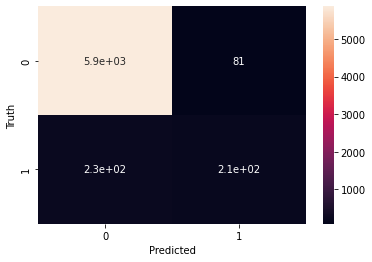

In [82]:
seaborn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [83]:
print("Accuracy of Random Forest on Test data: ", accuracy_score(y1, Y_predict)*100)

Accuracy of Random Forest on Test data:  95.07196495619525


In [84]:
#XGBoost Classifier

In [86]:
#from xgboost import XGBClassifier

In [87]:
# Importing libraries for Naive Bayes Classification and for accuracy checking. 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [88]:
# GaussianNB model
model = GaussianNB()

In [89]:
# MultinomialNB model
model1 = MultinomialNB()

In [90]:
# BernoulliNB model
model2 = BernoulliNB()

In [91]:
# Setting the training data to be the tweet vectors for presence feature type. 
x2 = tweetVectorsA[0:25570]
# Setting the corresponding sentiment label for each tweet vector.
y2 = trainTweetsP[1][0:25570].to_numpy()

In [92]:
# Using GaussianNB model to train the training data and sentiment labels.
model.fit(x2, y2)

GaussianNB()

In [93]:
# Using the GaussianNB model, after training, to predict the sentiment labels of test tweets, whose actual 
# sentiment labels are known.
predicted6 = model.predict(tweetVectorsA[25570:31962])

In [94]:
# Checking the accuracy of the model, based on the percentage of test tweets whose sentiment labels were 
# accurately predicted.
accuracy_score(trainTweetsP[1][25570:31962].to_numpy(), predicted6)*100

78.95807259073842

In [95]:
#MultinomialNB Model

In [96]:
model1.fit(x2, y2)

MultinomialNB()

In [97]:
predicted7 = model1.predict(tweetVectorsA[25570:31962])

In [98]:
accuracy_score(trainTweetsP[1][25570:31962].to_numpy(), predicted7)*100

94.50876095118899

In [99]:
#BernoulliNB Model

In [100]:
model2.fit(x2, y2)

BernoulliNB()

In [101]:
predicted8 = model2.predict(tweetVectorsA[25570:31962])

In [102]:
accuracy_score(trainTweetsP[1][25570:31962].to_numpy(), predicted8)*100

94.55569461827284

In [103]:
# Now, setting the training data to be the tweet vectors for frequency feature type.
x3 = idfVectors[0:25570]

In [104]:
#Training, predicting, accuracy checking

In [105]:
model.fit(x3, y2)

GaussianNB()

In [106]:
predicted9 = model.predict(idfVectors[25570:31962])

In [107]:
accuracy_score(trainTweetsP[1][25570:31962].to_numpy(), predicted9)*100

78.92678347934918

In [108]:
model1.fit(x3, y2)

MultinomialNB()

In [109]:
predicted10 = model1.predict(idfVectors[25570:31962])

In [110]:
accuracy_score(trainTweetsP[1][25570:31962].to_numpy(), predicted10)*100

91.80225281602003

In [111]:
model2.fit(x3, y2)

BernoulliNB()

In [112]:
predicted11 = model2.predict(idfVectors[25570:31962])

In [113]:
accuracy_score(trainTweetsP[1][25570:31962].to_numpy(), predicted11)*100

94.55569461827284

In [114]:
# Importing libraries for performing sequential Logistic Regression using keras.
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2

In [115]:
# Setting the relevant training data and actual outputs, similar to those used in Naive Bayes. 
xTrain1 = tweetVectorsA[0:25570]
xTrain2 = idfVectors[0:25570]
yTrain = trainTweetsP[1][0:25570].to_numpy()
xVal1 = tweetVectorsA[25570:31962]
xVal2 = idfVectors[25570:31962]
yVal = trainTweetsP[1][25570:31962].to_numpy()

In [116]:
# Building up the model for sequential Logistic Regression using keras. 

In [117]:
model = Sequential()

2022-04-07 01:45:36.340292: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [118]:
model.add(Dense(1, activation='sigmoid', kernel_regularizer=L1L2(l1=0.0, l2=0.1), input_dim=len(idfVectors[1])))

In [119]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [120]:
# Using the model to train the data for presence vectors representing tweets.
model.fit(xTrain2, yTrain, epochs=100, validation_data=(xVal2, yVal))

Epoch 1/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4697 - accuracy: 0.9254 - val_loss: 0.3910 - val_accuracy: 0.9334
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3519 - accuracy: 0.9303 - val_loss: 0.3159 - val_accuracy: 0.9307
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.2959 - accuracy: 0.9297 - val_loss: 0.2772 - val_accuracy: 0.9307
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 0.2681 - accuracy: 0.9296 - val_loss: 0.2576 - val_accuracy: 0.9307
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.2557 - accuracy: 0.9296 - val_loss: 0.2507 - val_accuracy: 0.9307
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.2512 - accuracy: 0.9296 - val_loss: 0.2470 - val_accuracy: 0.9307
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 0.2495 - accuracy: 0.9296 - val_loss: 0.2467 - val_accuracy: 0.9307

In [121]:
# Using the model, after training, to predict the sentiment labels of the test tweets represented by 
# presence vectors, whose actual sentiment labels are known. 
predictions = model.predict(xVal2).round()

In [122]:
# Checking the accuracy of the model, based on the percentage of test tweets whose sentiment labels were 
# accurately predicted.
accuracy_score(yVal, predictions)*100

93.0694618272841

In [123]:
# Importing library for SVM classification.
from sklearn import svm

In [124]:
# Building up the SVM model.
clf = svm.SVC(gamma='scale')

In [125]:
# Setting the training data, tweet vectors for presence, and actual outputs, sentiment labels. 
xA = tweetVectorsA[0:2000]
yA = trainTweetsP[1][0:2000].to_numpy()

In [126]:
# Using the SVM model to train the data. 
clf.fit(xA, yA)

SVC()

In [127]:
# Using the model, after training, to predict the sentiment labels of test tweets represented by 
# presence vectors, whose actual sentiment labels are known. Also, checking the accuracy of the model,
# based on the percentage of test tweets whose sentiment labels were accurately predicted. To account for 
# available memory, the test tweets are split into multiple groups and the accuracy of each group is determined. 

In [128]:
A = clf.predict(tweetVectorsA[2000:4000])

In [129]:
accuracy_score(trainTweetsP[1][2000:4000].to_numpy(), A)*100

93.60000000000001

In [130]:
B = clf.predict(tweetVectorsA[4000:6500])
accuracy_score(trainTweetsP[1][4000:6500].to_numpy(), B)*100

93.67999999999999

In [131]:
C = clf.predict(tweetVectorsA[6500:9000])
accuracy_score(trainTweetsP[1][6500:9000].to_numpy(), C)*100

93.84

In [132]:
D = clf.predict(tweetVectorsA[9000:11500])
accuracy_score(trainTweetsP[1][9000:11500].to_numpy(), D)*100

93.47999999999999

In [133]:
E = clf.predict(tweetVectorsA[11500:14000])
accuracy_score(trainTweetsP[1][11500:14000].to_numpy(), E)*100

93.84

In [134]:
F = clf.predict(tweetVectorsA[14000:16500])
accuracy_score(trainTweetsP[1][14000:16500].to_numpy(), F)*100

94.19999999999999

In [135]:
G = clf.predict(tweetVectorsA[16500:19000])
accuracy_score(trainTweetsP[1][16500:19000].to_numpy(), G)*100

94.19999999999999

In [136]:
H = clf.predict(tweetVectorsA[19000:21500])
accuracy_score(trainTweetsP[1][19000:21500].to_numpy(), H)*100

93.16

In [137]:
I = clf.predict(tweetVectorsA[21500:24000])
accuracy_score(trainTweetsP[1][21500:24000].to_numpy(), I)*100

93.04

In [138]:
J = clf.predict(tweetVectorsA[24000:26500])
accuracy_score(trainTweetsP[1][24000:26500].to_numpy(), J)*100

93.4

In [139]:
K = clf.predict(tweetVectorsA[26500:29000])
accuracy_score(trainTweetsP[1][26500:29000].to_numpy(), K)*100

93.52000000000001

In [140]:
L = clf.predict(tweetVectorsA[29000:31962])
accuracy_score(trainTweetsP[1][29000:31962].to_numpy(), L)*100

93.95678595543552

In [141]:
# Following the above steps, the general accuracy for the all the test tweets is determined manually using a calculator.
# This accuracy is determined to be 93.67%, for presence vectors. 

In [142]:
# Setting the training data, tweet vectors for frequency, and actual outputs, sentiment labels. 
xB = idfVectors[0:2000]
yB = trainTweetsP[1][0:2000].to_numpy()

In [143]:
# Using the SVM model to train the data.
clf.fit(xB, yB)

SVC()

In [144]:
# Using the model, after training, to predict the sentiment labels of test tweets represented by 
# frequency vectors, whose actual sentiment labels are known. Also, checking the accuracy of the model,
# based on the percentage of test tweets whose sentiment labels were accurately predicted. To account for 
# available memory, the test tweets are split into multiple groups and the accuracy of each group is determined.

In [145]:
a = clf.predict(idfVectors[2000:4500])
accuracy_score(trainTweetsP[1][2000:4500].to_numpy(), a)*100

93.84

In [146]:
b = clf.predict(idfVectors[4500:7000])
accuracy_score(trainTweetsP[1][4500:7000].to_numpy(), b)*100

93.47999999999999

In [147]:
c = clf.predict(idfVectors[7000:9500])
accuracy_score(trainTweetsP[1][7000:9500].to_numpy(), c)*100

93.88

In [148]:
d = clf.predict(idfVectors[9500:12000])
accuracy_score(trainTweetsP[1][9500:12000].to_numpy(), d)*100

93.47999999999999

In [149]:
e = clf.predict(idfVectors[12000:14500])
accuracy_score(trainTweetsP[1][12000:14500].to_numpy(), e)*100

93.76

In [150]:
f = clf.predict(idfVectors[14500:17000])
accuracy_score(trainTweetsP[1][14500:17000].to_numpy(), f)*100

93.88

In [151]:
g = clf.predict(idfVectors[17000:19500])
accuracy_score(trainTweetsP[1][17000:19500].to_numpy(), g)*100

94.16

In [152]:
h = clf.predict(idfVectors[19500:22000])
accuracy_score(trainTweetsP[1][19500:22000].to_numpy(), h)*100

93.47999999999999

In [153]:
i = clf.predict(idfVectors[22000:24500])
accuracy_score(trainTweetsP[1][22000:24500].to_numpy(), i)*100

92.96

In [154]:
j = clf.predict(idfVectors[24500:27000])
accuracy_score(trainTweetsP[1][24500:27000].to_numpy(), j)*100

93.52000000000001

In [155]:
k = clf.predict(idfVectors[27000:29500])
accuracy_score(trainTweetsP[1][27000:29500].to_numpy(), k)*100

93.64

In [156]:
l = clf.predict(idfVectors[29500:31962])
accuracy_score(trainTweetsP[1][29500:31962].to_numpy(), l)*100

93.78554021121039

In [157]:
# Following the above steps, the general accuracy for the all the test tweets is determined manually using a calculator.
# This accuracy is determined to be 93.66%, for frequency vectors.

In [158]:
#Also, test models on other data sets